In [2]:
using Plots
using DiffEqFlux, OrdinaryDiffEq, Flux, Optim
include("/Users/piotrsokol/Documents/RNNODE.jl/src/rnn_ode.jl")

LoadError: LoadError: LoadError: UndefVarError: T not defined
in expression starting at /Users/piotrsokol/Documents/RNNODE.jl/src/interp.jl:121
in expression starting at /Users/piotrsokol/Documents/RNNODE.jl/src/rnn_ode.jl:1

In [ ]:
ipt = randn(Float32,100)
Lipt = LinearInterpolationFixedGrid(ipt);
Constipt = ConstantInterpolationFixedGrid(ipt);
Cubipt = CubicSplineFixedGrid(ipt);

In [ ]:
n = nograd(Lipt)


In [3]:
∂nn = ∂GRUCell(1,2)
tsteps = 0.0:1.:100.0
node = RNNODE(∂nn, [0.f0,100.f0], saveat=tsteps);

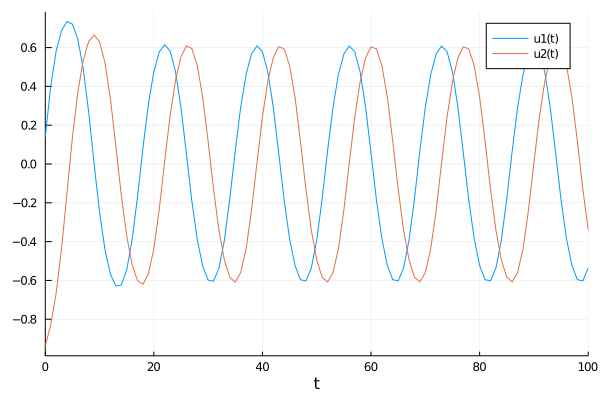

In [4]:
sol = node(node.u₀);
plot(sol)

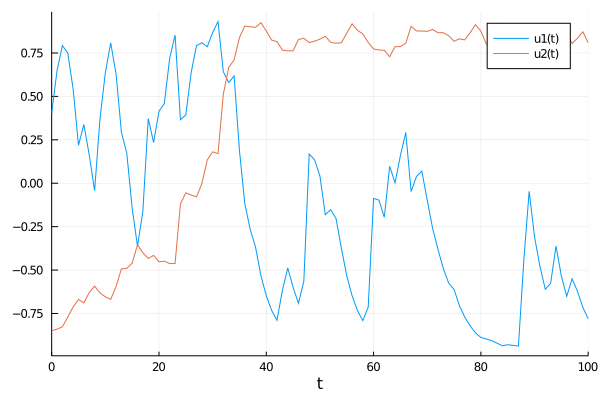

In [77]:
sol = node(Cubipt);
plot(sol)

In [49]:
function predict_neuralode(p)
  Array(node(Cubipt, p=p))
end

function loss_neuralode(p)
    pred = predict_neuralode(p)
    loss = sum(abs2, pred .- 0.0)
    return loss, pred
end
callback = function (p, l, pred; doplot = true)
  display(l)
  # plot current prediction against data
  if doplot
    display(plot( permutedims(pred[1:2,1,:]), label = ""))
  end
  return false
end

#111 (generic function with 1 method)

198.2953158150574

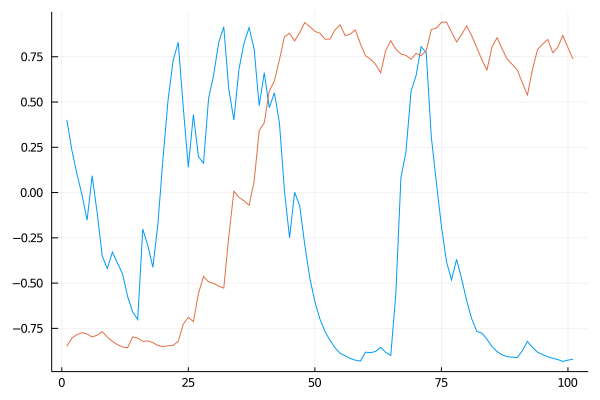

175.31568685220853

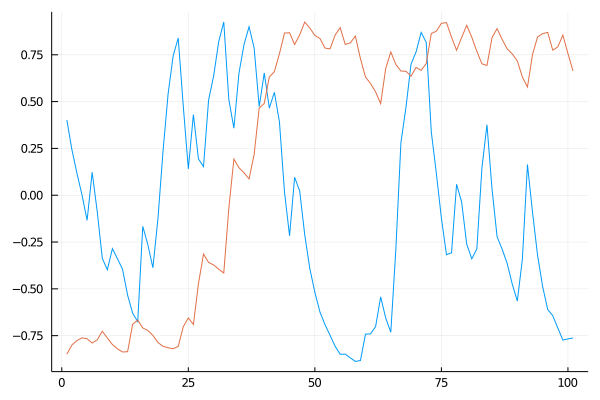

loss: 175:   4%|█▋                                      |  ETA: 0:00:03

154.51796822885532

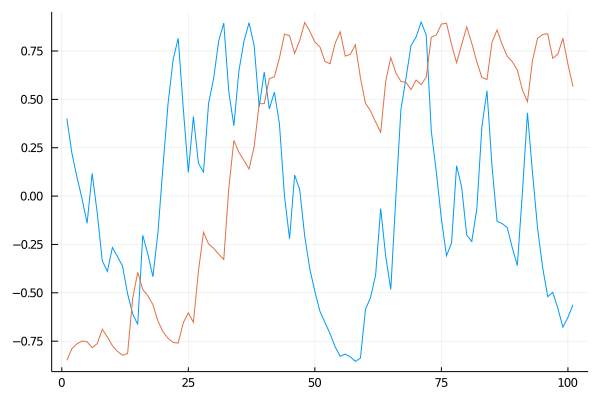

loss: 155:   6%|██▍                                     |  ETA: 0:00:05

127.94017952515345

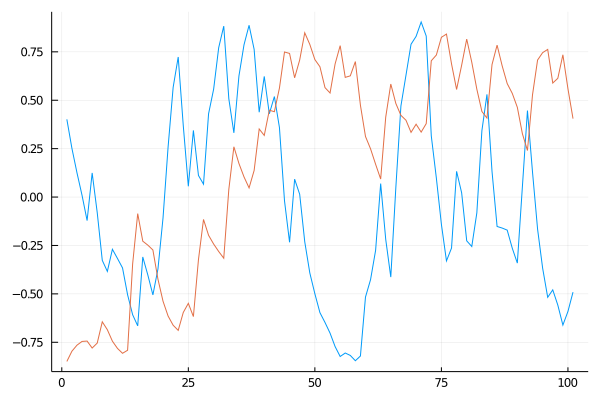

loss: 128:   8%|███▎                                    |  ETA: 0:00:06

100.37270890724228

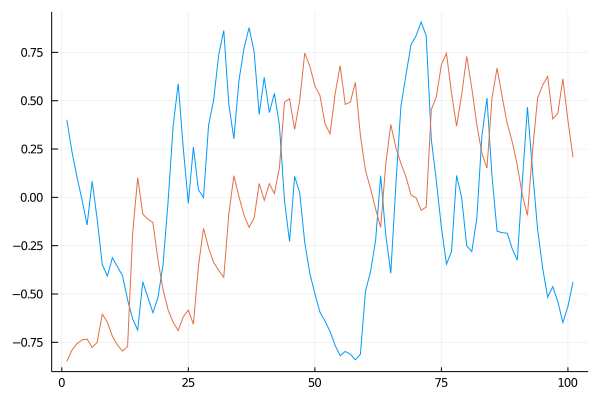

loss: 100:  10%|████                                    |  ETA: 0:00:06

82.4560617489795

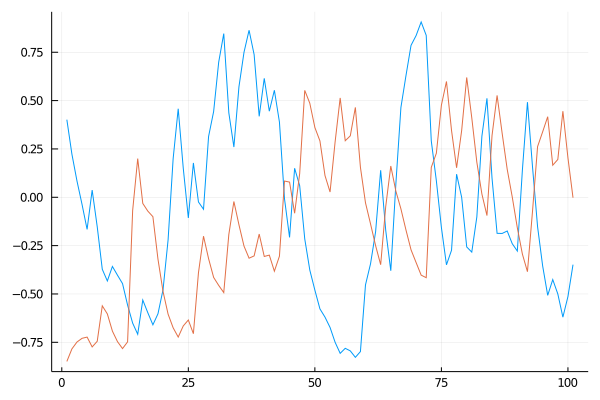

loss: 82.5:  12%|████▋                                  |  ETA: 0:00:06

82.99655480030901

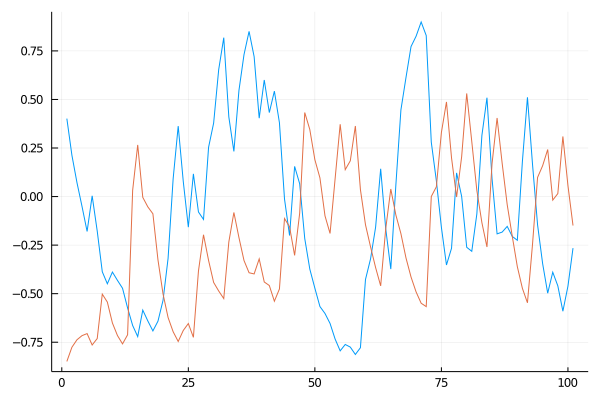

loss: 83:  14%|█████▊                                   |  ETA: 0:00:06

78.85088301529213

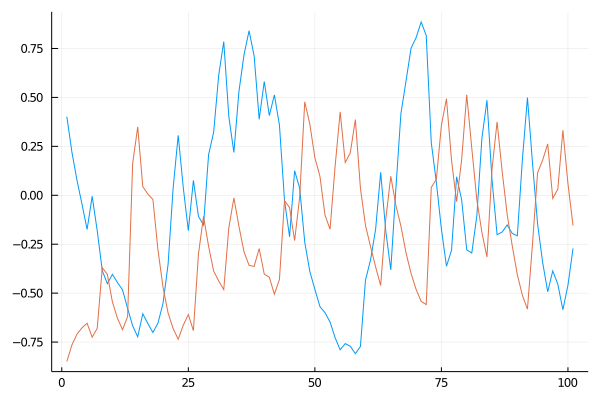

loss: 78.9:  16%|██████▎                                |  ETA: 0:00:06

72.59040244720283

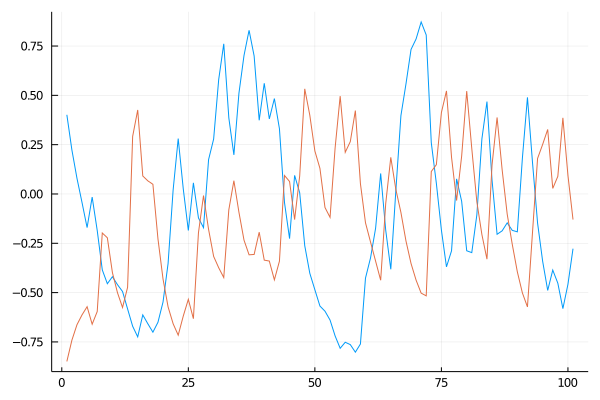

loss: 72.6:  18%|███████                                |  ETA: 0:00:06

67.39009060409455

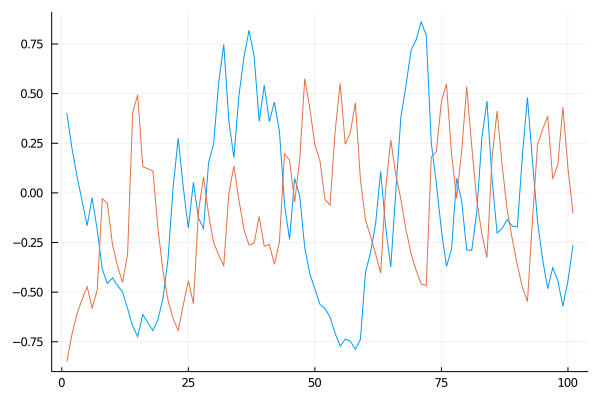

loss: 67.4:  20%|███████▊                               |  ETA: 0:00:06

63.32545181251269

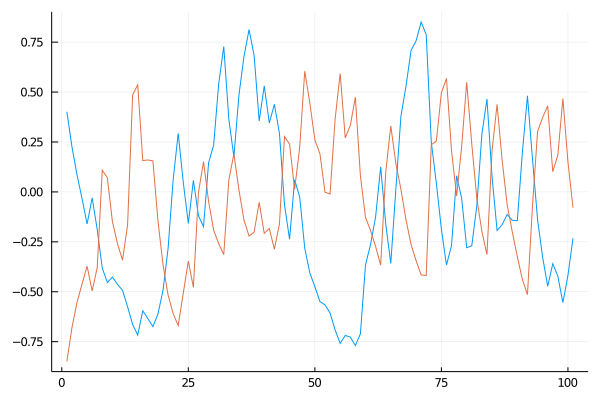

loss: 63.3:  22%|████████▋                              |  ETA: 0:00:06

60.07218126129323

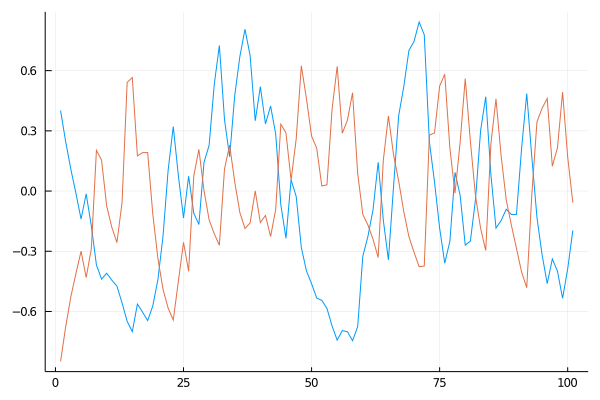

loss: 60.1:  24%|█████████▍                             |  ETA: 0:00:06

57.36418408068145

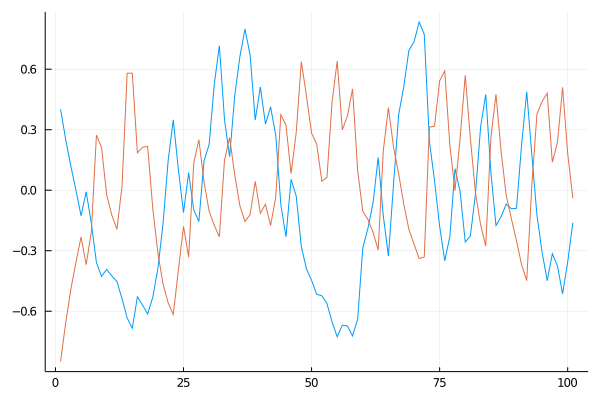

loss: 57.4:  26%|██████████▏                            |  ETA: 0:00:06

55.031107988012266

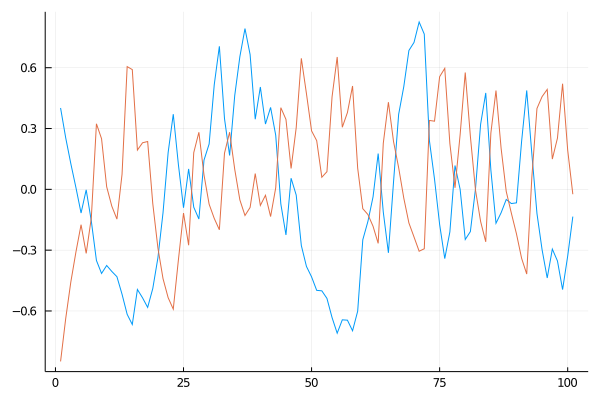

loss: 55:  28%|███████████▌                             |  ETA: 0:00:06

52.929569681310625

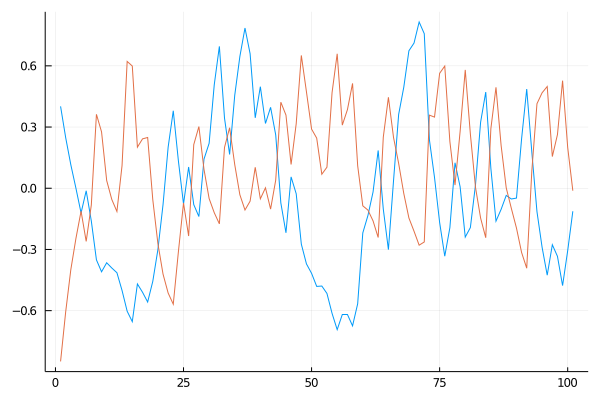

loss: 52.9:  30%|███████████▊                           |  ETA: 0:00:06

50.9302154369177

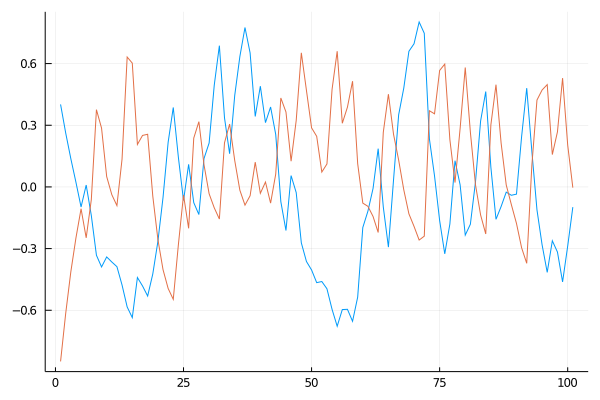

loss: 50.9:  32%|████████████▌                          |  ETA: 0:00:06

48.928252530454756

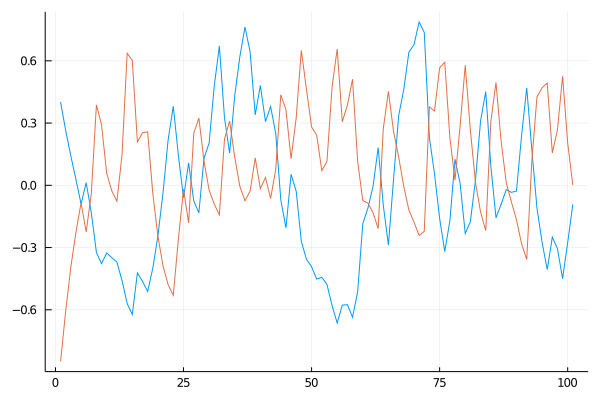

loss: 48.9:  34%|█████████████▎                         |  ETA: 0:00:05

46.857137348310076

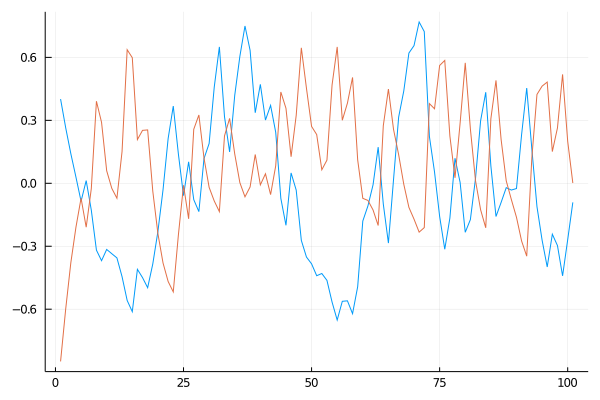

loss: 46.9:  36%|██████████████                         |  ETA: 0:00:05

44.583387948338526

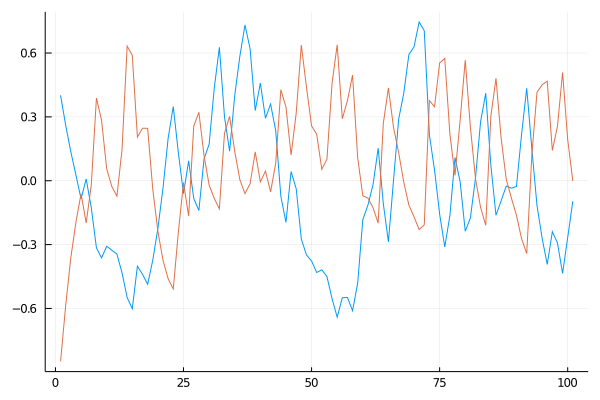

loss: 44.6:  38%|██████████████▉                        |  ETA: 0:00:05

42.319636796483735

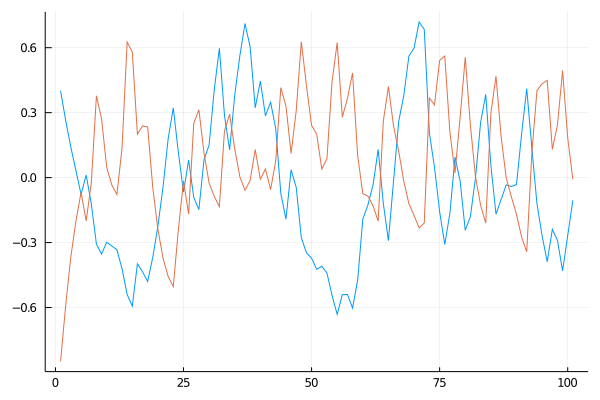

loss: 42.3:  40%|███████████████▋                       |  ETA: 0:00:05

40.047104882859145

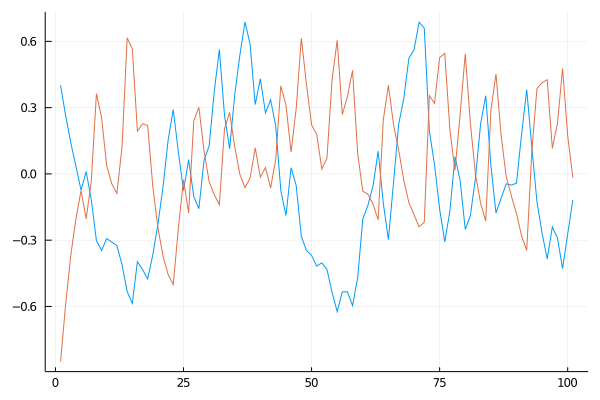

loss: 40:  42%|█████████████████▎                       |  ETA: 0:00:05

37.78747295574678

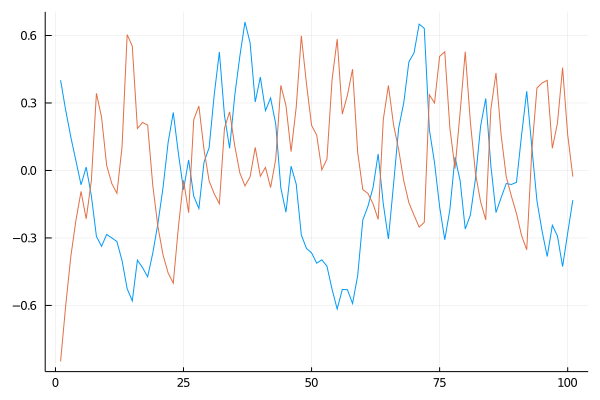

loss: 37.8:  44%|█████████████████▏                     |  ETA: 0:00:05

35.61501952081879

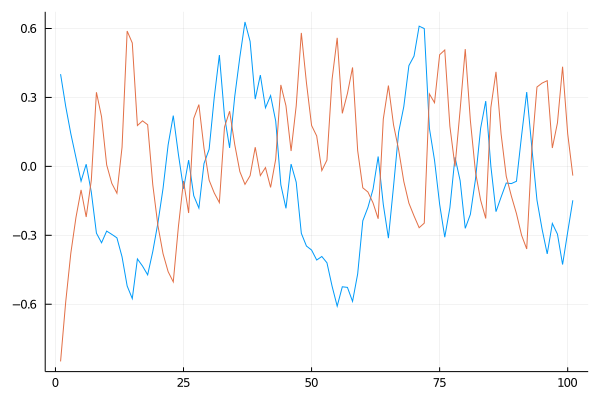

loss: 35.6:  46%|██████████████████                     |  ETA: 0:00:04

33.56119652526546

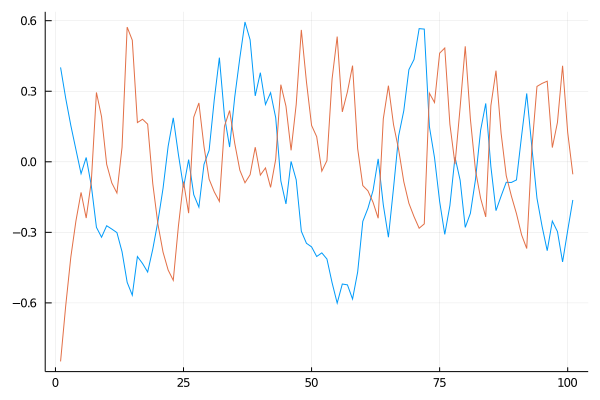

loss: 33.6:  48%|██████████████████▊                    |  ETA: 0:00:04

31.75630017671436

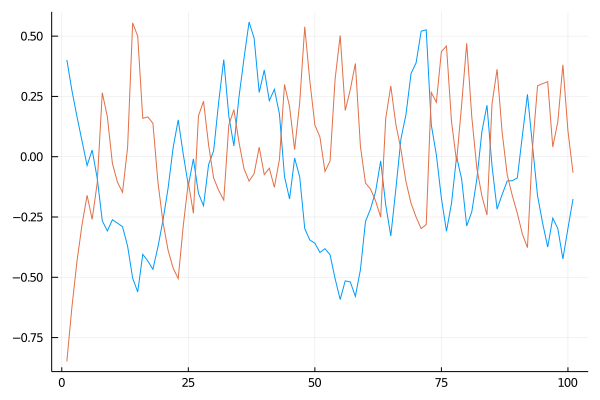

loss: 31.8:  50%|███████████████████▌                   |  ETA: 0:00:04

30.04366907974798

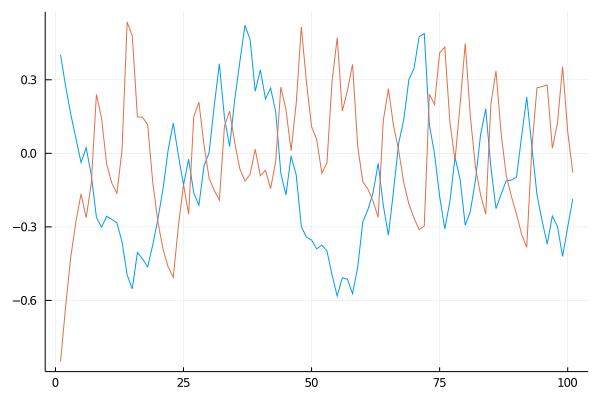

loss: 30:  52%|█████████████████████▍                   |  ETA: 0:00:04

28.472316303468865

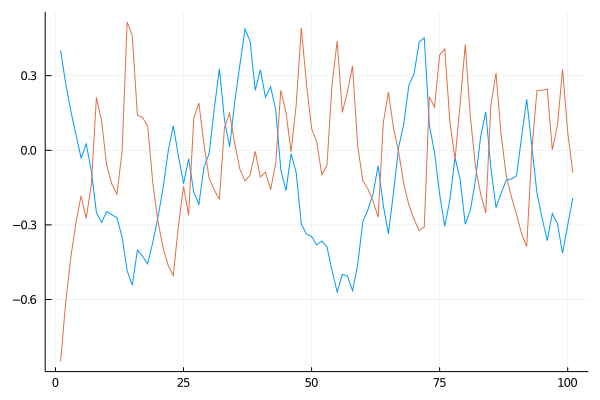

loss: 28.5:  54%|█████████████████████                  |  ETA: 0:00:04

27.06807394190558

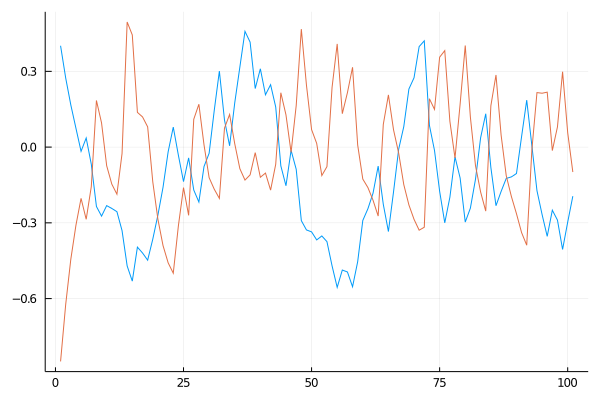

loss: 27.1:  56%|█████████████████████▉                 |  ETA: 0:00:04

25.64100893094998

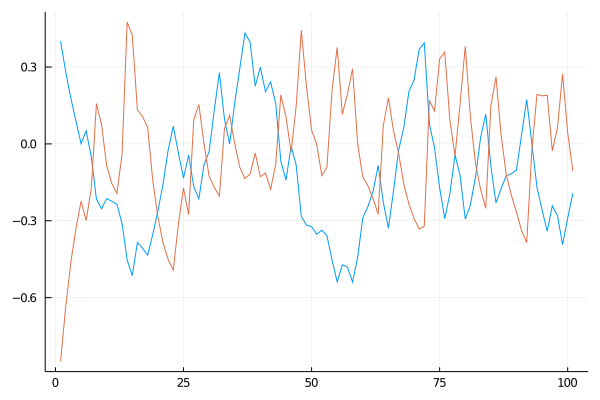

loss: 25.6:  58%|██████████████████████▋                |  ETA: 0:00:03

24.21009386631823

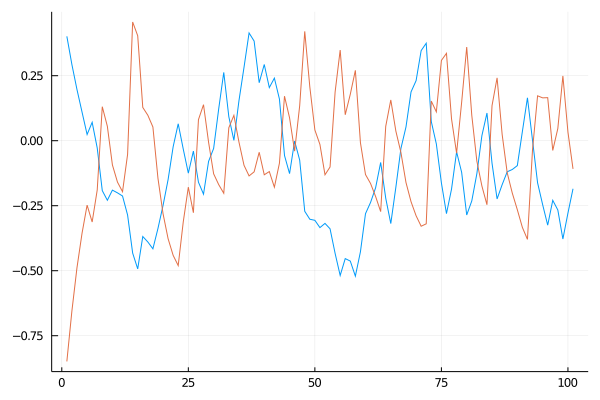

loss: 24.2:  60%|███████████████████████▍               |  ETA: 0:00:03

22.702350650902858

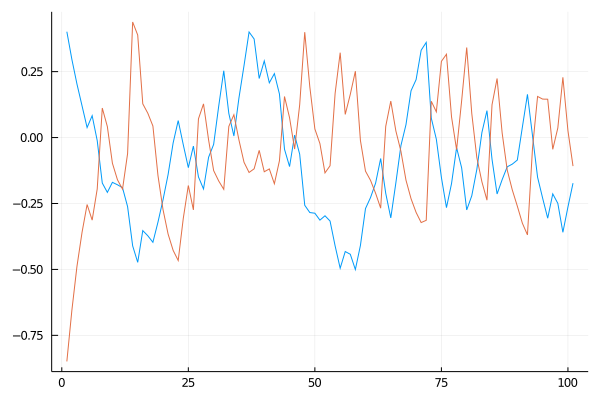

loss: 22.7:  62%|████████████████████████▏              |  ETA: 0:00:03

21.23726917881614

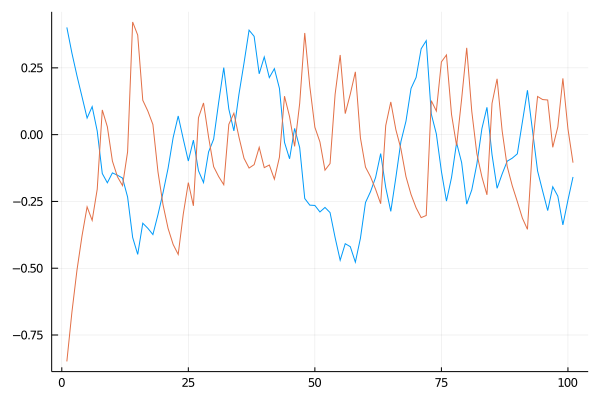

loss: 21.2:  64%|█████████████████████████              |  ETA: 0:00:03

19.799268058316773

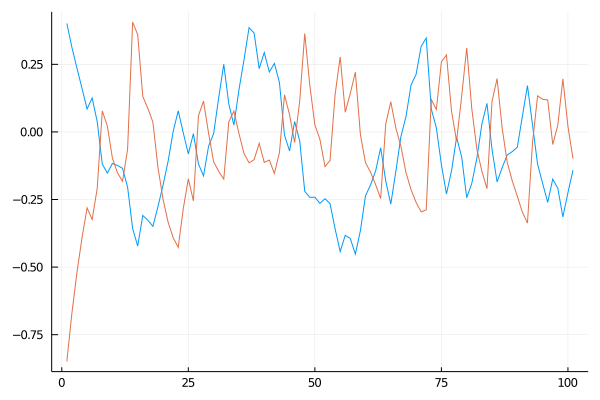

loss: 19.8:  66%|█████████████████████████▊             |  ETA: 0:00:03

18.431382247974376

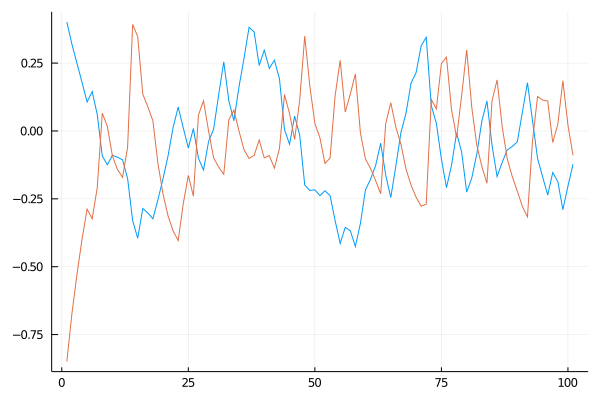

loss: 18.4:  68%|██████████████████████████▌            |  ETA: 0:00:03

17.177878954259292

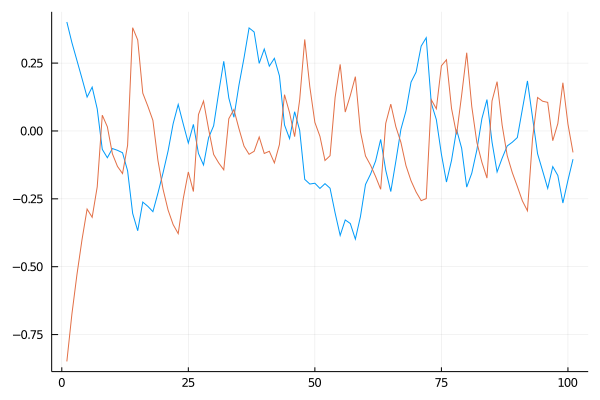

loss: 17.2:  70%|███████████████████████████▎           |  ETA: 0:00:02

16.091159220599426

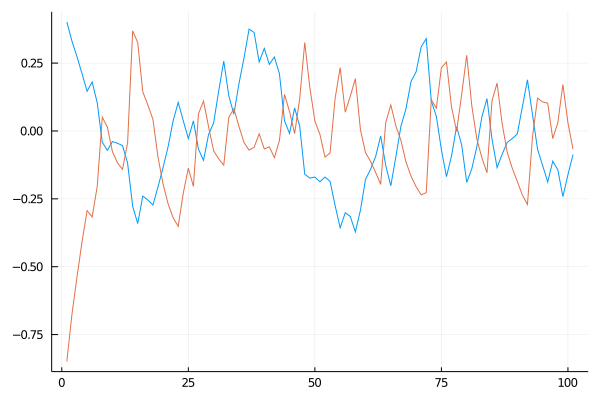

loss: 16.1:  72%|████████████████████████████▏          |  ETA: 0:00:02

15.096778000625697

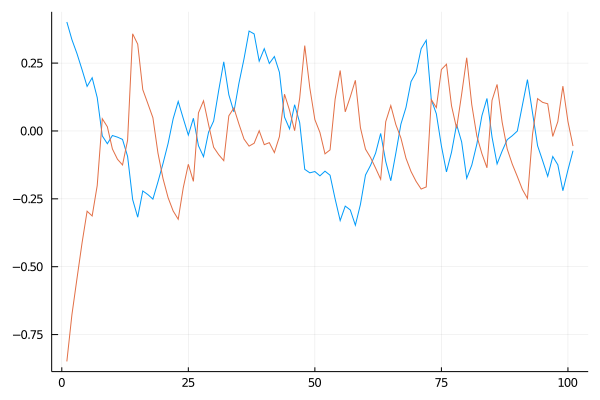

loss: 15.1:  74%|████████████████████████████▉          |  ETA: 0:00:02

14.12532924387502

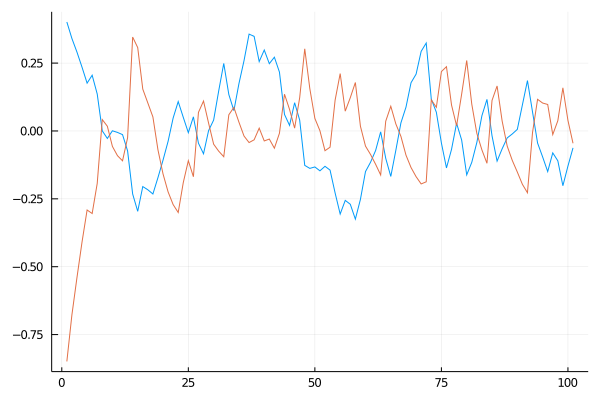

loss: 14.1:  76%|█████████████████████████████▋         |  ETA: 0:00:02

13.189247642668871

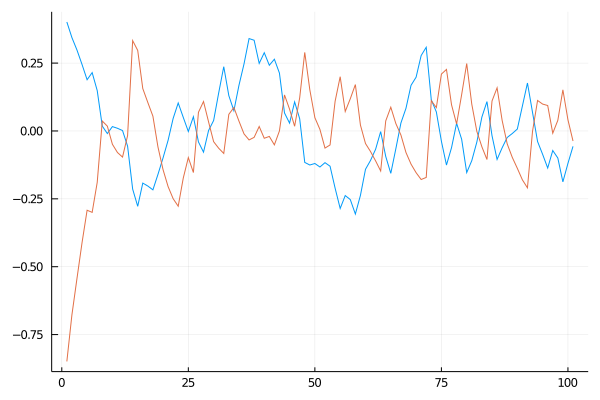

loss: 13.2:  78%|██████████████████████████████▍        |  ETA: 0:00:02

11.82585099727331

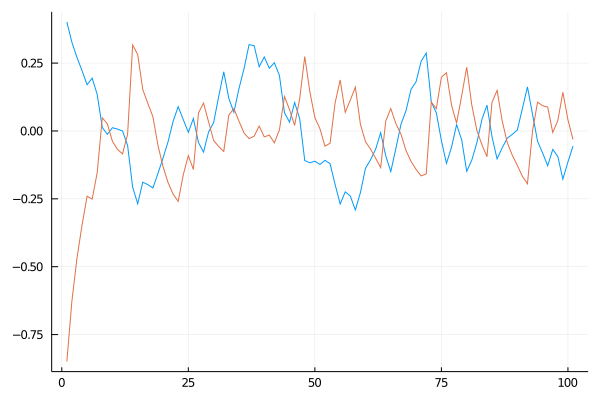

loss: 11.8:  80%|███████████████████████████████▎       |  ETA: 0:00:02

10.895129628956148

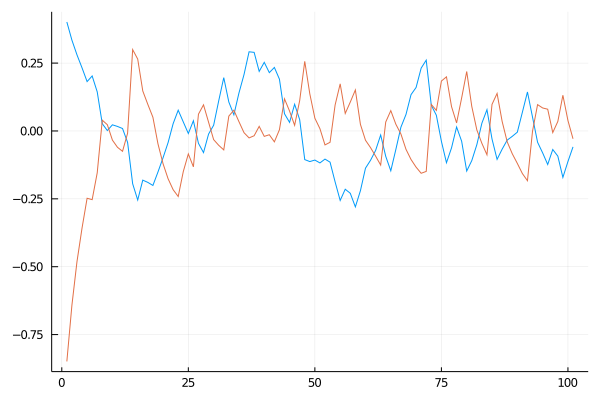

loss: 10.9:  82%|████████████████████████████████       |  ETA: 0:00:01

9.965022597439079

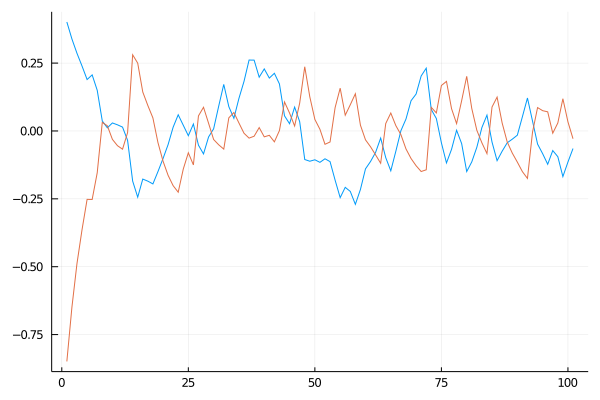

loss: 9.97:  84%|████████████████████████████████▊      |  ETA: 0:00:01

9.095646945579599

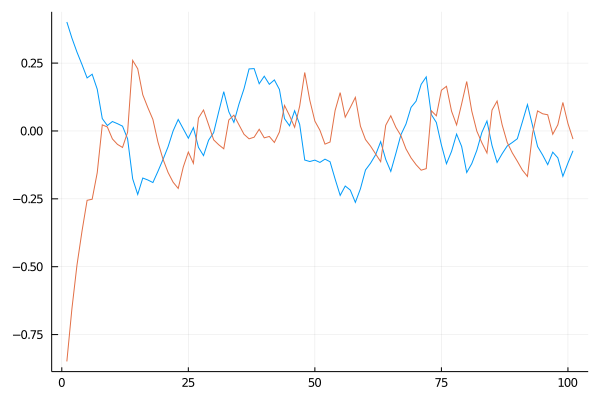

loss: 9.1:  86%|██████████████████████████████████▍     |  ETA: 0:00:01

8.31665657357694

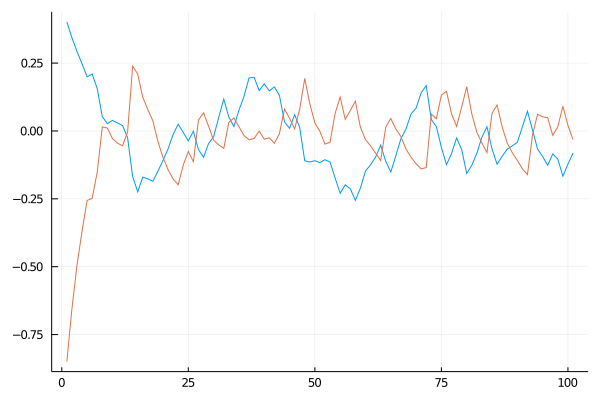

loss: 8.32:  88%|██████████████████████████████████▍    |  ETA: 0:00:01

7.736090525711077

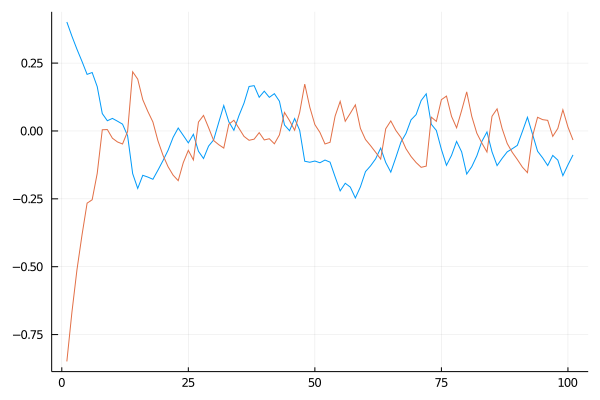

loss: 7.74:  90%|███████████████████████████████████▏   |  ETA: 0:00:01

7.176577937143749

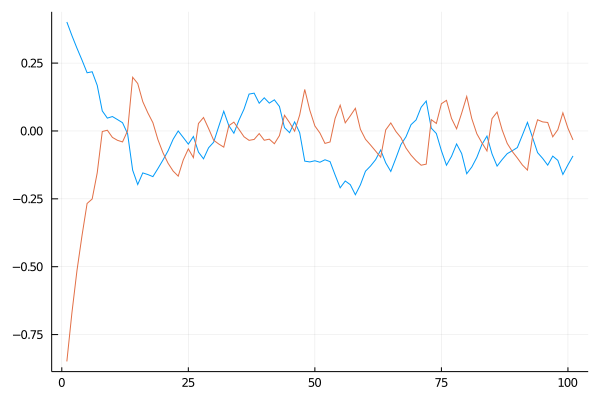

loss: 7.18:  92%|███████████████████████████████████▉   |  ETA: 0:00:01

6.7478043754985535

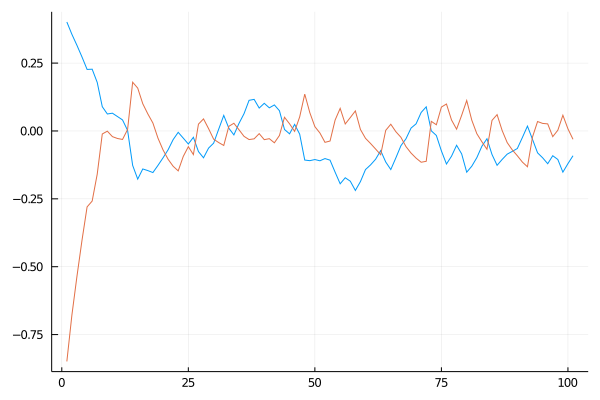

loss: 6.75:  94%|████████████████████████████████████▋  |  ETA: 0:00:00

6.238626774749606

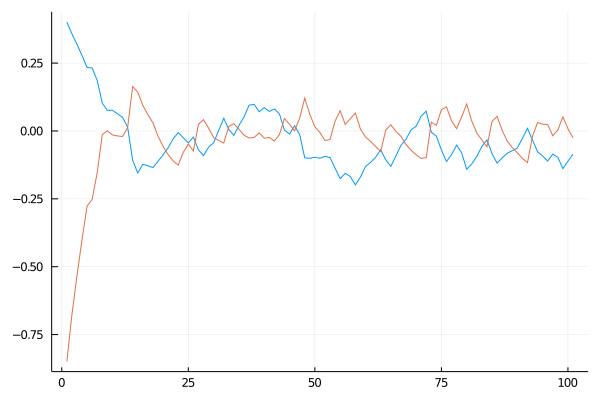

loss: 6.24:  96%|█████████████████████████████████████▌ |  ETA: 0:00:00

5.811365260608191

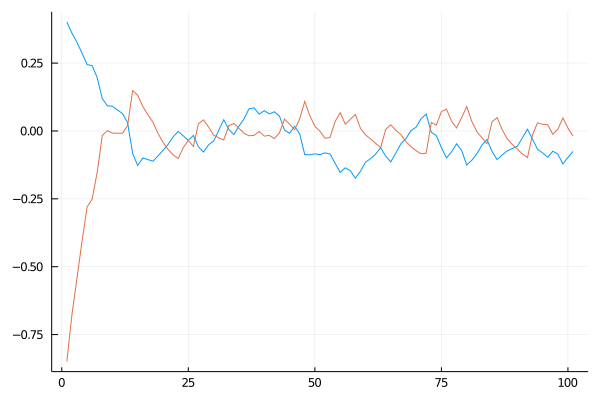

loss: 5.81:  98%|██████████████████████████████████████▎|  ETA: 0:00:00

5.461323526165781

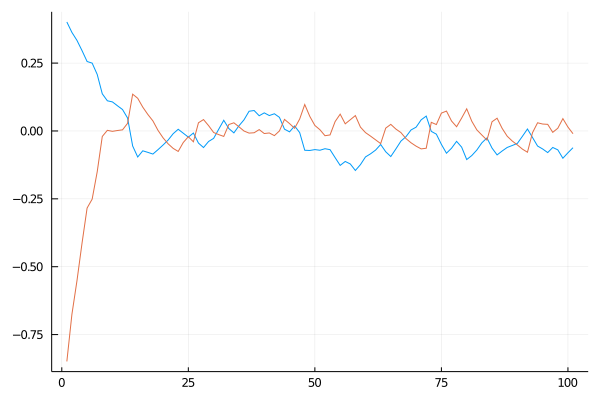

loss: 5.46: 100%|███████████████████████████████████████| Time: 0:00:07


5.461323526165781

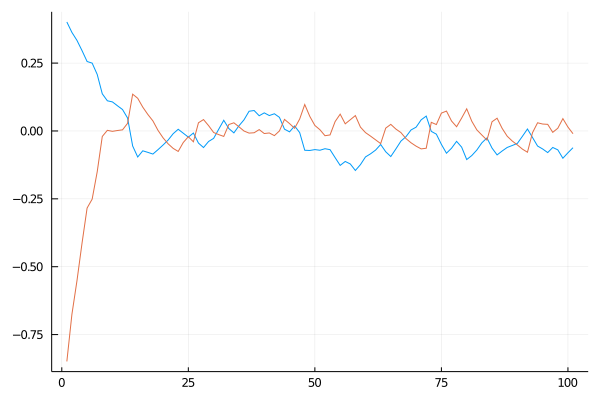

 * Status: success

 * Candidate solution
    Final objective value:     5.461324e+00

 * Found with
    Algorithm:     ADAM

 * Convergence measures
    |x - x'|               = NaN ≰ 0.0e+00
    |x - x'|/|x'|          = NaN ≰ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = NaN ≰ 0.0e+00

 * Work counters
    Seconds run:   8  (vs limit Inf)
    Iterations:    50
    f(x) calls:    50
    ∇f(x) calls:   50


In [50]:
result_neuralode = DiffEqFlux.sciml_train(loss_neuralode, node.p,
                                          ADAM(0.05), cb = callback,
                                          maxiters = 50)